<a href="https://colab.research.google.com/github/FerdiErs/Portofolio/blob/main/Valorant%20Master%20Reykjavik%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valorant Master Reykjavík Exploratory Data Analysis(EDA)

Valorant is a team-based first-person hero shooter set in the near future.Players play as one of a set of Agents, characters designed based on several countries and cultures around the world.In the main game mode, players are assigned to either the attacking or defending team with each team having five players on it. Agents have unique abilities, each requiring charges, as well as a unique ultimate ability that requires charging through kills, deaths, orbs, or objectives. Every player starts each round with a "classic" pistol and one or more "signature ability" charges.Other weapons and ability charges can be purchased using an in-game economic system that awards money based on the outcome of the previous round, any kills the player is responsible for, and any objectives completed. The game has an assortment of weapons including secondary guns like sidearms and primary guns like submachine guns, shotguns, machine guns, assault rifles and sniper rifles.There are automatic and semi-automatic weapons that each have a unique shooting pattern that has to be controlled by the player to be able to shoot accurately. Different agents allow players to find more ways to plant the Spike and style on enemies with scrappers, strategists, and hunters of every description. It currently offers 16 agents to choose from. They are Brimstone, Viper, Omen, Cypher, Sova, Sage, Phoenix, Jett, Raze, Breach, Reyna, Killjoy, Skye, Yoru, Astra, KAY/O, and Chamber.

# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import seaborn as sns
import re
from collections import Counter

# Import dataset

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/FerdiErs/Data-Source/main/ValorantMaster2021/player_stats.csv?token=AV6RQOXLTJTZD5BPIPL54O3BXBVQU') 
df1.head()

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,TenZ,Canada,Sentinels,"['Jett', 'Reyna', 'Raze']",9,206,139,55,1.48,1.87,289,22.8,15.4,6.1
1,ScreaM,Belgium,Team Liquid,"['Sage', 'Phoenix']",9,177,131,56,1.35,1.77,265,19.6,14.5,6.2
2,ShahZaM,United States,Sentinels,"['Sova', 'Jett']",9,172,134,52,1.28,1.67,240,19.1,14.8,5.7
3,L1NK,United Kingdom,Team Liquid,"['Brimstone', 'Omen']",9,147,123,57,1.19,1.65,218,16.3,13.6,6.3
4,Jamppi,Finland,Team Liquid,"['Jett', 'Killjoy']",9,155,130,32,1.19,1.43,229,17.2,14.4,3.5


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   50 non-null     object 
 1   Country  50 non-null     object 
 2   Team     50 non-null     object 
 3   Agents   50 non-null     object 
 4   Maps     50 non-null     int64  
 5   K        50 non-null     int64  
 6   D        50 non-null     int64  
 7   A        50 non-null     int64  
 8   KD       50 non-null     float64
 9   KDA      50 non-null     float64
 10  ACS/Map  50 non-null     int64  
 11  K/Map    50 non-null     float64
 12  D/Map    50 non-null     float64
 13  A/Map    50 non-null     float64
dtypes: float64(5), int64(5), object(4)
memory usage: 5.6+ KB


In [4]:
country_from = dict(Counter(df1['Country']))
country_from = {'Country': list(country_from.keys()), 'count': list(country_from.values())}

fig_country= px.pie(country_from, values = 'count', names = 'Country', title = 'Player Country Distribution', hole = .5, color_discrete_sequence = px.colors.sequential.Agsunset)
fig_country.show()

# TOP FIVE PLAYER

In [5]:
top_five = df1.sort_values(by='KDA', ascending=False).head()
top_five

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,TenZ,Canada,Sentinels,"['Jett', 'Reyna', 'Raze']",9,206,139,55,1.48,1.87,289,22.8,15.4,6.1
1,ScreaM,Belgium,Team Liquid,"['Sage', 'Phoenix']",9,177,131,56,1.35,1.77,265,19.6,14.5,6.2
7,Mistic,United Kingdom,Fnatic,"['Viper', 'Skye']",16,240,206,120,1.16,1.74,191,15.0,12.8,7.5
2,ShahZaM,United States,Sentinels,"['Sova', 'Jett']",9,172,134,52,1.28,1.67,240,19.1,14.8,5.7
3,L1NK,United Kingdom,Team Liquid,"['Brimstone', 'Omen']",9,147,123,57,1.19,1.65,218,16.3,13.6,6.3


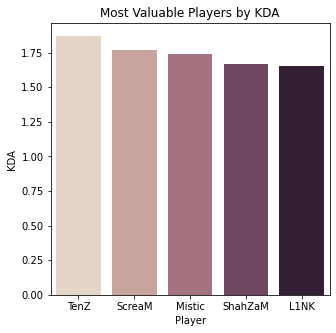

In [6]:
fig,ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)

ax.set_xlim(0,2)
plt.title("Most Valuable Players by KDA")
sns.barplot(x="Player",y = "KDA",data=top_five, palette= "ch:start=.2")

# FIVE WORST PLAYER

In [7]:
worst_player = df1.sort_values(by='KDA', ascending=True).head()
worst_player

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
49,Fra,Brazil,Sharks Esports,"['Killjoy', 'Skye', 'Sage']",5,35,69,17,0.50,0.75,122,7.0,13.8,3.4
48,Light,Brazil,Sharks Esports,"['Omen', 'Brimstone']",5,35,67,22,0.52,0.85,125,7.0,13.4,4.4
47,GtnziN,Brazil,Team Vikings,"['Raze', 'Yoru']",6,60,96,28,0.62,0.91,141,10.0,16.0,4.6
45,Rion,Japan,Crazy Raccoon,"['Astra', 'Viper', 'Omen']",4,46,67,16,0.68,0.92,148,11.5,16.7,4.0
38,NagZ,Chile,KRÜ Esports,"['Jett', 'Sage']",6,67,81,13,0.82,0.98,169,11.1,13.5,2.1


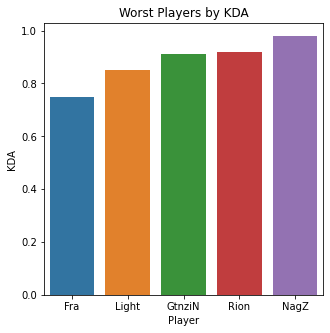

In [8]:
fig,ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)

ax.set_xlim(0,2)
plt.title("Worst Players by KDA")
sns.barplot(x="Player",y = "KDA", data = worst_player)

# Top Assist

In [26]:
top_assist = df1.sort_values(by='A/Map', ascending=False).head()
top_assist

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
18,Dapr,United States,Sentinels,"['Cypher', 'Viper', 'Sage']",9,127,123,73,1.03,1.62,184,14.1,13.6,8.1
25,Mazino,Chile,KRÜ Esports,"['Viper', 'Sage']",6,78,80,46,0.97,1.55,213,13.0,13.3,7.6
7,Mistic,United Kingdom,Fnatic,"['Viper', 'Skye']",16,240,206,120,1.16,1.74,191,15.0,12.8,7.5
19,Doma,Croatia,Fnatic,"['Sage', 'Omen', 'Raze']",16,247,241,120,1.02,1.52,205,15.4,15.0,7.5
30,Zombs,United States,Sentinels,"['Astra', 'Viper']",9,121,133,67,0.90,1.41,170,13.4,14.7,7.4


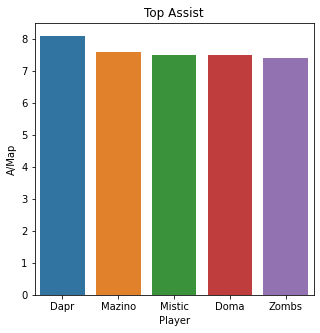

In [28]:
fig,ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)

ax.set_xlim(0,2)
plt.title("Top Assist")
sns.barplot(x="Player",y = "A/Map", data = top_assist)